In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops


In [134]:


fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/' , one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [135]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))


Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [136]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

y = 9 (Ankle boot)


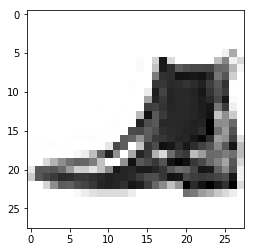

In [139]:
# Sample 1

# Get 28x28 image
sample_1 = fashion_mnist.train.images[5].reshape(28,28)
# Get corresponding integer label from one-hot encoded data
sample_label_1 = np.where(fashion_mnist.train.labels[5] == 1)[0][0]
# Plot sample
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')


In [140]:
def init_wgts(shape):
    init_random_dist = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(init_random_dist)

In [141]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape = shape)
    return tf.Variable(init_bias_vals)

In [142]:
def conv2d(x, W):
    """
    x -> [batch, H, W, Channels]
    W -> [filter H, Filter W, Channel IN, Channel OUT]
    Use a stride of 1, keep padding same
    """
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding = 'SAME')

In [143]:
def max_pool_2by2(x):
    """
    x --> [batch, h, w, channels], a 4D Tensor
    """
    return tf.nn.max_pool(x, ksize=[1,2,2,1],
                          strides=[1,2,2,1],
                          padding = 'SAME')

In [144]:
def convolutional_layer(input_x, shape):
    W= init_wgts(shape)
    b= init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W)+b)

In [145]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_wgts([input_size,size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [146]:
#placeholders
x= tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [147]:
x_image = tf.reshape(x, [-1,28,28,1])

In [148]:
#layer 1
convo_1 = convolutional_layer(x_image, shape = [5,5,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

#layer 2
convo_2= convolutional_layer(convo_1_pooling, shape= [2,2,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

#flatten it out
convo_2_flat = tf.reshape(convo_2_pooling, [-1, 7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 1064))

In [149]:
hold_prob = tf.placeholder(tf.float32)

In [150]:
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob = hold_prob)

In [151]:
#Y_pred label
y_pred = normal_full_layer(full_one_dropout, 10)

In [152]:
#loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits= y_pred))

In [153]:
#optimizer
optimizer= tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [154]:
#init
init = tf.global_variables_initializer()

In [155]:
steps = 5000

In [158]:
session = tf.Session()

with session as sess:
    sess.run(init)
    
    for i in range(steps):
        batch_x, batch_y = fashion_mnist.train.next_batch(500)
        
        #grab from the next batch
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y, hold_prob:0.7})
       
        #print out message every 100
        if i%100 == 0:
            print("Currently on step{}".format(i))
            print("Test Accuracy is:")
            #Test the train model
            matches = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
            acc = tf.reduce_mean(tf.cast(matches, tf.float32))
            print(sess.run(acc, feed_dict = {x:fashion_mnist.test.images, y_true:fashion_mnist.test.labels, hold_prob:0.5}))
            print('\n')

Currently on step0
Test Accuracy is:
0.12


Currently on step100
Test Accuracy is:
0.6446


Currently on step200
Test Accuracy is:
0.7402


Currently on step300
Test Accuracy is:
0.7754


Currently on step400
Test Accuracy is:
0.7978


Currently on step500
Test Accuracy is:
0.8168


Currently on step600
Test Accuracy is:
0.8178


Currently on step700
Test Accuracy is:
0.8334


Currently on step800
Test Accuracy is:
0.8393


Currently on step900
Test Accuracy is:
0.8347


Currently on step1000
Test Accuracy is:
0.847


Currently on step1100
Test Accuracy is:
0.8494


Currently on step1200
Test Accuracy is:
0.8502


Currently on step1300
Test Accuracy is:
0.8569


Currently on step1400
Test Accuracy is:
0.8556


Currently on step1500
Test Accuracy is:
0.8563


Currently on step1600
Test Accuracy is:
0.8595


Currently on step1700
Test Accuracy is:
0.8601


Currently on step1800
Test Accuracy is:
0.8655


Currently on step1900
Test Accuracy is:
0.8647


Currently on step2000
Test Accuracy